<a href="https://colab.research.google.com/github/Muhirwakyeyune/Unsupervised_learning_projects/blob/main/Kmeans_clustering_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

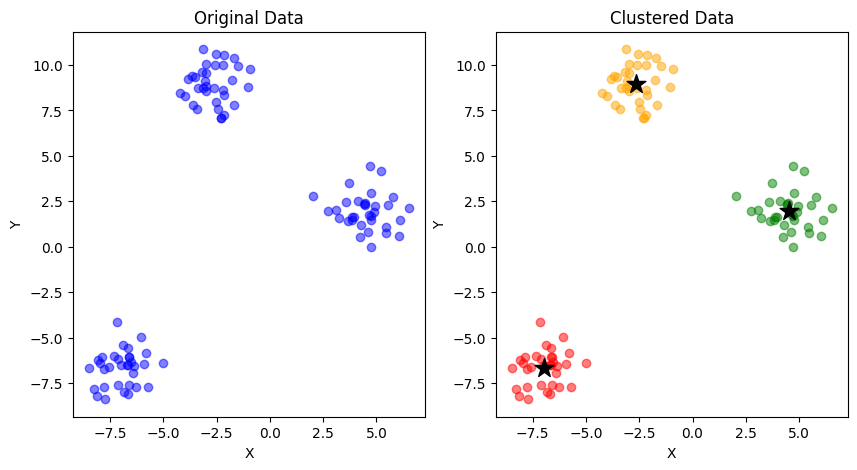

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

class KMeansClustering:
    def __init__(self, num_clusters=2, max_iterations=100):
        self.num_clusters = num_clusters
        self.max_iterations = max_iterations
    
    def fit(self, X):
        # Step 1: Initialize cluster centroids randomly
        self.centroids = self._initialize_centroids(X)
        
        for i in range(self.max_iterations):
            # Step 2: Assign each data point to the closest centroid
            clusters = self._assign_clusters(X)
            
            # Step 3: Update the centroids based on the mean of the data points in each cluster
            new_centroids = self._update_centroids(X, clusters)
            
            # Step 4: Check for convergence by comparing new and old centroids
            if np.allclose(new_centroids, self.centroids):
                break
                
            self.centroids = new_centroids
            
    def predict(self, X):
        # Return the assigned cluster label for each data point
        return self._assign_clusters(X)
    
    def _initialize_centroids(self, X):
        # Randomly choose K data points as initial centroids
        idx = np.random.choice(X.shape[0], self.num_clusters, replace=False)
        centroids = X[idx]
        return centroids
    
    def _assign_clusters(self, X):
        # Calculate Euclidean distance between each data point and centroid
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Assign each data point to the closest centroid
        clusters = np.argmin(distances, axis=0)
        return clusters
    
    def _update_centroids(self, X, clusters):
        # Update centroid positions based on mean of data points in each cluster
        new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(self.num_clusters)])
        return new_centroids

# Generate random data using make_blobs
X ,_= make_blobs(n_samples=100, centers=3, random_state=42)

# Create KMeansClustering object and fit to data
kmeans = KMeansClustering(num_clusters=3, max_iterations=100)
kmeans.fit(X)

# Predict cluster labels for new data
new_data = np.array([[0, 0], [10, 10]])
predicted_labels = kmeans.predict(new_data)

# Visualize the data and clusters
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original data points
axs[0].scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5)
axs[0].set_title('Original Data')

# Plot the data points colored by cluster
cluster_colors = ['red', 'green', 'orange']
for i in range(kmeans.num_clusters):
    axs[1].scatter(X[kmeans.predict(X) == i, 0], X[kmeans.predict(X) == i, 1], color=cluster_colors[i], alpha=0.5)
    axs[1].scatter(kmeans.centroids[i, 0], kmeans.centroids[i, 1], color='black', marker='*', s=200)
axs[1].set_title('Clustered Data')

# Set the axis labels
for ax in axs:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
class KMeans:
  def __init__(self, iter=100, k=3):
    self.iter=iter
    self.k=k
  def fit(self, x):
    #choose randommly, centroids
    self.centroids=self.initialize_centroids(x)
    for i in range(self.iter):
      # calculate distance and assign data points to each points
      cluster=self.assign_clusters(x)
      #update centroids
      new_centroids=self.update_centroids(x, cluster)
      if np.allclose(new_centroids, self.centroids):
        break
      self.centroids=new_centroids  
  def predict(self,x):
    return self.assign_clusters(x)    

  
  def update_centroids(self, x, cluster):
    new_centroids=np.array([x[cluster==i].mean(axis=0) for i in range(self.k)])
    return new_centroids  
  def assign_clusters(self, x):
    distances=np.sqrt(((x-self.centroids[:, np.newaxis])**2).sum(axis=2)  )
    cluster=np.argmin(distances, axis=0)
    return cluster
  def initialize_centroids(self, x):
    idx=np.random.choice(x.shape[0], self.k, replace=False)  
    centroids=x[idx]
    return centroids



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


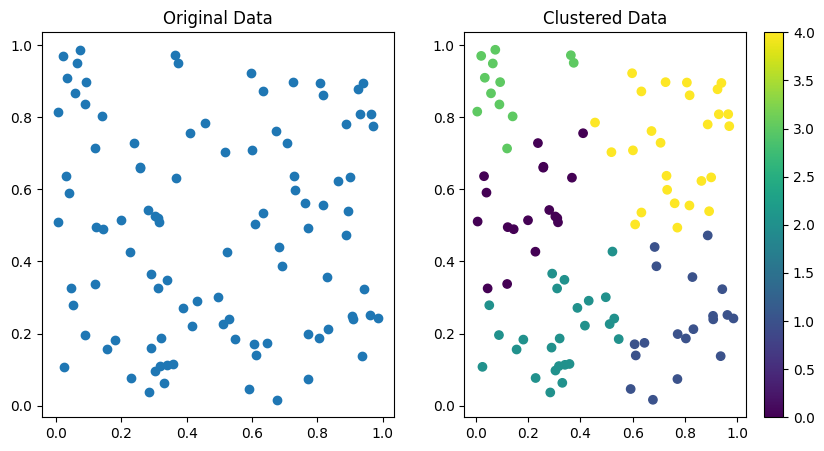

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate some random data
np.random.seed(42)
X = np.random.rand(100, 2)

# Create a KMeans object with 3 clusters
kmeans = KMeans(n_clusters=5)

# Fit the data to the KMeans model
kmeans.fit(X)

# Get the predicted cluster labels for the data points
labels = kmeans.predict(X)

# Create a 1x2 subplot grid
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original data
ax[0].scatter(X[:, 0], X[:, 1])
ax[0].set_title('Original Data')

# Plot the clustered data
scatter = ax[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
ax[1].set_title('Clustered Data')

# Add a colorbar to the right of the clustered data subplot
fig.colorbar(scatter, ax=ax[1])

plt.show()


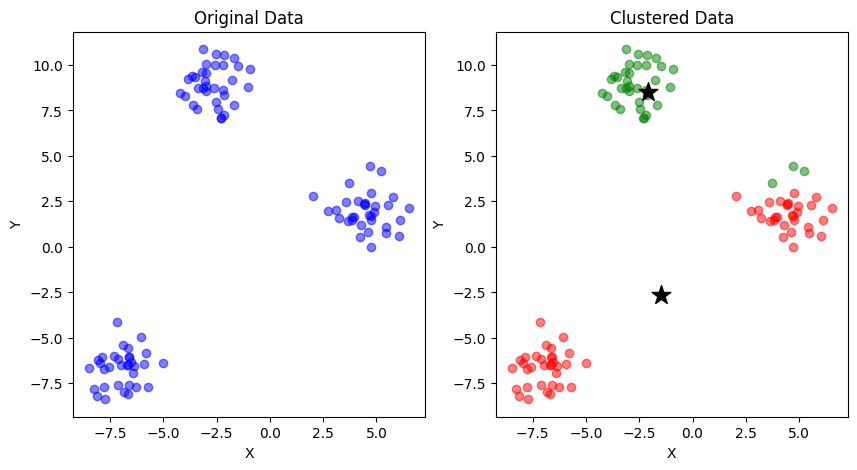

In [ ]:
X ,_= make_blobs(n_samples=100, centers=3, random_state=42)

# Create KMeansClustering object and fit to data
kmeans = KMeans(100, 2)
kmeans.fit(X)

# Predict cluster labels for new data
new_data = np.array([[0, 0], [10, 10]])
predicted_labels = kmeans.predict(new_data)

# Visualize the data and clusters
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original data points
axs[0].scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5)
axs[0].set_title('Original Data')

# Plot the data points colored by cluster
cluster_colors = ['red', 'green', 'orange']
for i in range(kmeans.k):
    axs[1].scatter(X[kmeans.predict(X) == i, 0], X[kmeans.predict(X) == i, 1], color=cluster_colors[i], alpha=0.5)
    axs[1].scatter(kmeans.centroids[i, 0], kmeans.centroids[i, 1], color='black', marker='*', s=200)
axs[1].set_title('Clustered Data')

# Set the axis labels
for ax in axs:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plt.show()